In [10]:
import numpy as np
import matplotlib.pyplot as plt
import time

# Count live neighbors
def num_live_neigh(mat, i, j):
    x_size, y_size = mat.shape
    count = 0
    for dx in [-1, 0, 1]:
        for dy in [-1, 0, 1]:
            if dx == 0 and dy == 0: # doesn't count the cell itself (only its neighbors)
                continue
            ni = i + dx
            nj = j + dy
            if 0 <= ni < x_size and 0 <= nj < y_size:
                count += mat[ni, nj]
    return count

# Run the simulation
### Rules ###
## 1. If the cells is alive (=1):
# It dies if it has fewer than 2 live neighbors (underpopulation) OR more than 3 live neighbors (overpopulation)
# It lives if it has 2 or 3 live neighbors
## 2. If the cell is dead (=0):
# It becomes alive if it has EXACTLY 3 live neighbors

def gol(mat, iterations, pause_time=0.08):
    prev_mat = None
    prev_prev_mat = None

    x_size, y_size = mat.shape
    for timestep in range(iterations):
        next_gen = np.copy(mat)
        for i in range(x_size):
            for j in range(y_size):
                live_neighbors = num_live_neigh(mat, i, j)
                if mat[i, j] == 1: # cell state at time t (alive)
                    if live_neighbors < 2 or live_neighbors > 3:
                        next_gen[i, j] = 0 # cell dies at time t+1 due to underpopulation/overpopulation
                else: # cell is dead at time t
                    if live_neighbors == 3:
                        next_gen[i, j] = 1 # cell becomes alive at t+1

        if prev_mat is not None and prev_prev_mat is not None:
            if np.array_equal(next_gen, prev_mat) and np.array_equal(prev_mat, prev_prev_mat):
                plt.imshow(mat, cmap='gray')
                plt.title(f"Stable pattern at timestep {timestep}")
                plt.show()
                print(f"Pattern has stabilized at timestep {timestep}!")
                return  # Stop the simulation

        prev_prev_mat = prev_mat
        prev_mat = np.copy(next_gen)

        mat = next_gen
        plt.imshow(mat, cmap='gray')
        plt.title(f"Game of Life - Timestep {timestep}")
        plt.pause(pause_time)
    plt.show()

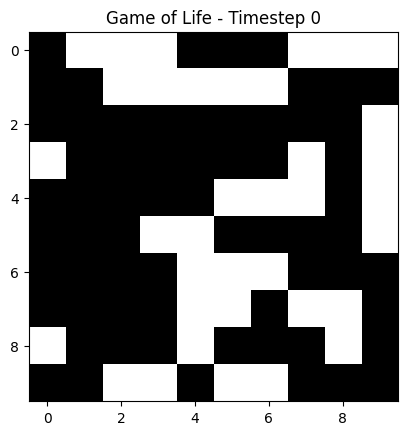

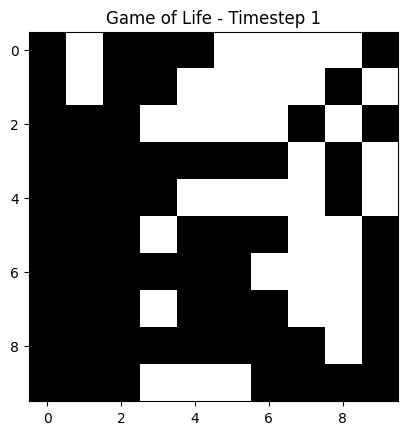

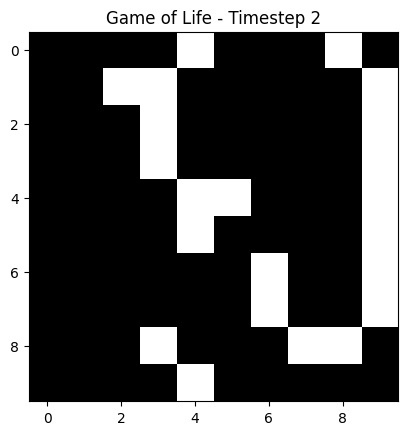

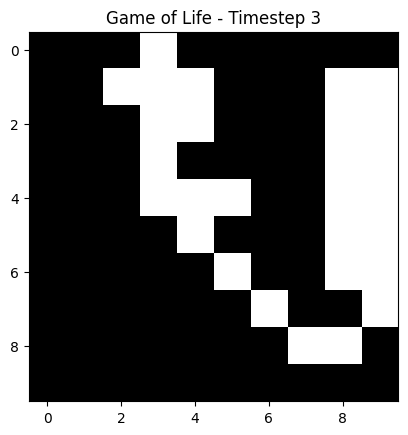

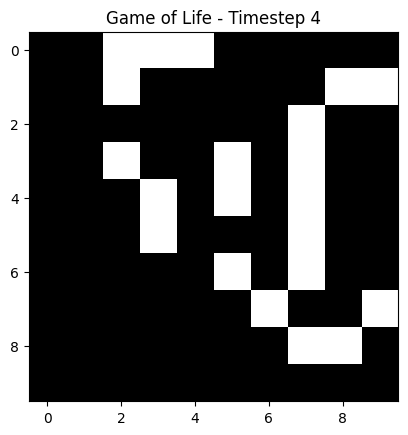

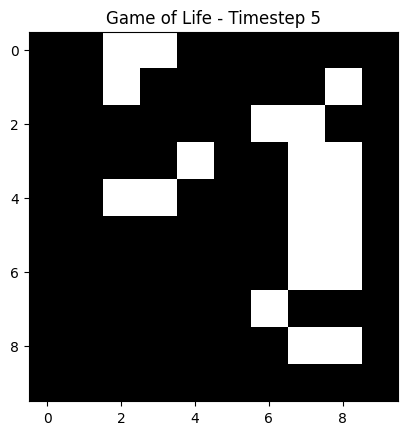

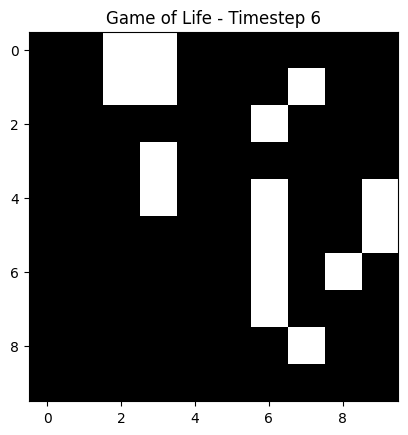

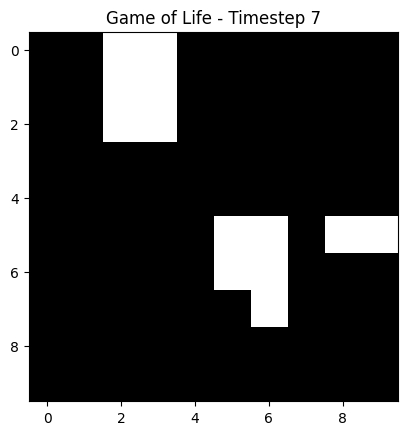

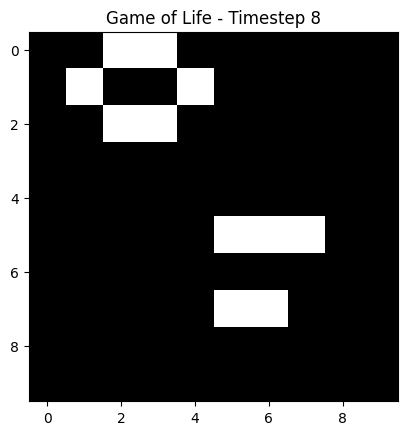

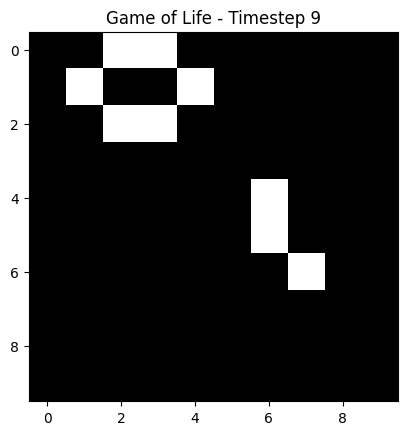

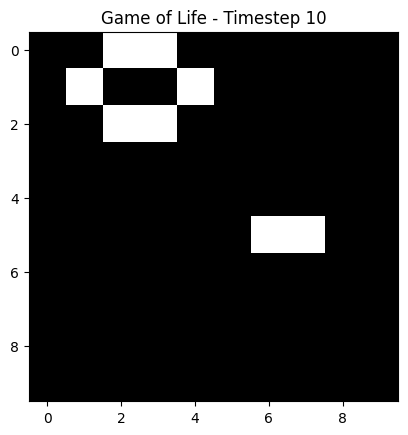

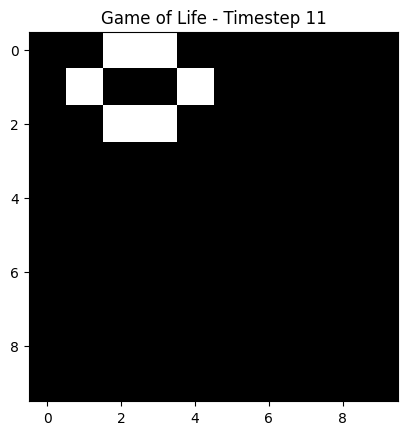

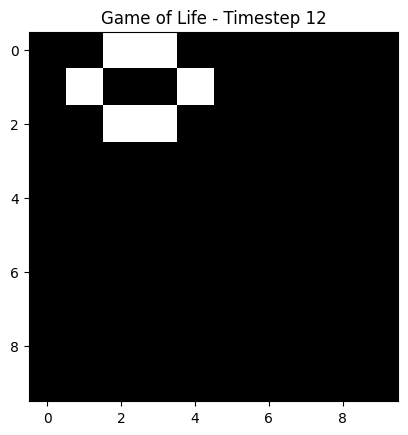

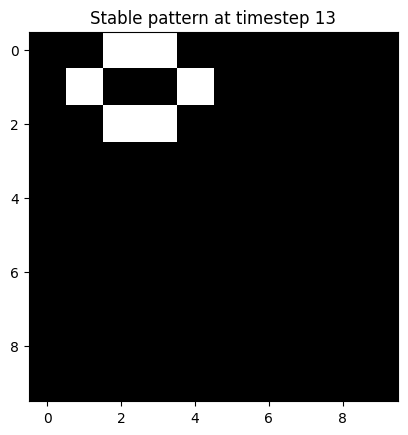

Pattern has stabilized at timestep 13!


In [13]:
if __name__ == "__main__":
    # Change the dimensions of input matrix and number of iterations (m = 20, n = 20, num_iter 20 right now)
    initial_matrix = np.random.randint(0, 2, (10, 10))
    gol(initial_matrix, iterations=100)